<a href="https://colab.research.google.com/github/ferreirathiago/deeplearning/blob/master/TCC_Simplificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://github.com/ferreirathiago/deeplearning/blob/master/Cranio.zip?raw=true
!unzip Cranio.zip?raw=true -d /

--2019-07-09 14:55:15--  https://github.com/ferreirathiago/deeplearning/blob/master/Cranio.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ferreirathiago/deeplearning/raw/master/Cranio.zip [following]
--2019-07-09 14:55:15--  https://github.com/ferreirathiago/deeplearning/raw/master/Cranio.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ferreirathiago/deeplearning/master/Cranio.zip [following]
--2019-07-09 14:55:15--  https://raw.githubusercontent.com/ferreirathiago/deeplearning/master/Cranio.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent

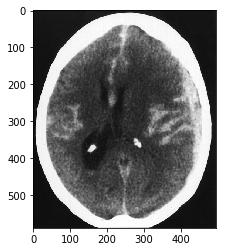

Imagem  5


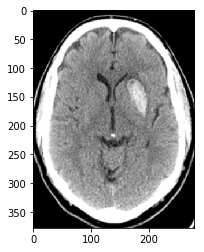

Imagem  12


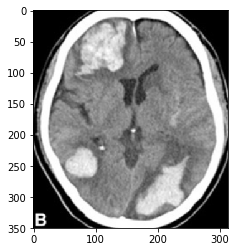

Imagem  18


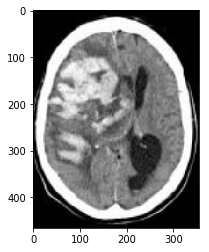

Imagem  29


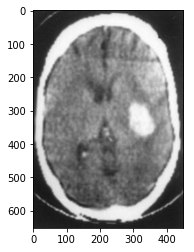

Imagem  40


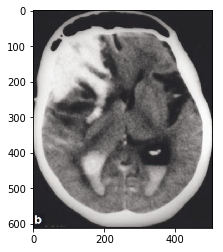

Imagem  77


In [28]:
#Como Keras "enxerga" a imagem
import cv2
from matplotlib import pyplot as plt

for ID_arquivo  in [5, 12, 18, 29, 40, 77]:
    imagem = cv2.imread(hematoma_lista[ID_arquivo])
    plt.imshow(imagem)
    plt.show()
    print("Imagem ", ID_arquivo )

In [5]:
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPool2D, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Concatenate, add
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, Dense, LeakyReLU
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
seed(1)
from tensorflow import set_random_seed
from glob import glob
from matplotlib import pyplot as plt
import cv2
import numpy as np

set_random_seed(2)
PYTHONHASHSEED=0

hematoma_dir = '/Cranio/Hematoma/*.png'
normal_dir = '/Cranio/Normal/*.png'

hematoma_lista = glob(hematoma_dir)
normal_lista = glob(normal_dir)

dataset = []
labels = [] 

for arquivo in hematoma_lista: # para cada arquivo de imagem na lista hematoma:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) #abre o arquivo como escala de cinzas e coloca a imagem na variável img
    img = cv2.resize(img, (256,256)) #redimensiona a imagem para 256 x 256 e salva na mesma variável img
    dataset.append(img) #adiciona essa imagem na lista do dataset e 
    labels.append(1) #informa que ela é um caso de hematoma (1)

for arquivo in normal_lista: # para cada arquivo de imagem na lista hematoma:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) #abre o arquivo como escala de cinzas e coloca a imagem na variável img
    img = cv2.resize(img, (256,256)) #redimensiona a imagem para 256 x 256 e salva na mesma variável img
    dataset.append(img) #adiciona essa imagem na lista do dataset e 
    labels.append(0) #informa que ela é um caso normal (0)
    
dataset = np.asarray(dataset, dtype=np.float32) #transforma a lista de variáveis numa matriz
labels = np.asarray(labels)

for i in range(len(dataset)):
  dataset[i] = (dataset[i] - np.average(dataset[i], axis= (0, 1))) / np.std(dataset[i], axis= (0, 1))

Using TensorFlow backend.


In [7]:
imgs = Input(shape=(256,256,1))
drop_size = 0.35

#Camadas da Rede
x = Conv2D(8, 3, padding='same', activation='relu')(imgs)
x = MaxPool2D()(x)
x = Dropout(drop_size)(x) #Reduzir overfitting.
x = Conv2D(16, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Dropout(drop_size)(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Dropout(drop_size)(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(16, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Dropout(drop_size)(x)
x = MaxPool2D()(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
#x = Conv2D(16, 3, padding='same', activation='relu')(x)
#x = Dropout(drop_size)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x) #Finalmente adicionaremos duas camadas densas, ou 'Fully Connected Layers'.
x = Dense(32, activation='relu')(x) #Essas camadas são redes neurais convencionais, sem convolução.
x = Dropout(drop_size)(x)

#Definiremos agora a entrada e a saída da rede
#A função Dense tem o argumento "1" pois a saída da rede é a classificação hematoma x não-hematoma
outputs = Dense(1, activation='sigmoid')(x)

inputs = imgs
Rede_TCC = Model(inputs=[inputs], outputs=[outputs])

custom_adam = optimizers.Adam(lr=0.0005, decay=0.0002)
Rede_TCC.compile(loss='binary_crossentropy', optimizer=custom_adam, metrics=['acc']) 

dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset[:,...,np.newaxis], 
                                                         labels[:,...,np.newaxis], test_size=0.1, random_state=88)
dataset_train, dataset_val, labels_train, labels_val = train_test_split(dataset_train, 
                                                       labels_train, test_size=0.11, random_state=88)

print('(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)')
print(' ');
print('Dataset de treino = ', dataset_train.shape, labels_train.shape)
print('Dataset de Validação =', dataset_val.shape, labels_val.shape)
print('Dataset de Teste =', dataset_test.shape, labels_test.shape)

(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)
 
Dataset de treino =  (320, 256, 256, 1) (320, 1)
Dataset de Validação = (40, 256, 256, 1) (40, 1)
Dataset de Teste = (40, 256, 256, 1) (40, 1)


Treinando a Rede_TCC:
Epoch 1/100
16/16 [==============================] - 8s 484ms/step - loss: 0.6980 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5250

Epoch 00001: val_loss improved from inf to 0.69306, saving model to Melhor_modelo.hdf5
Epoch 2/100
16/16 [==============================] - 1s 62ms/step - loss: 0.6866 - acc: 0.5656 - val_loss: 0.6922 - val_acc: 0.7000

Epoch 00002: val_loss improved from 0.69306 to 0.69223, saving model to Melhor_modelo.hdf5
Epoch 3/100
16/16 [==============================] - 1s 79ms/step - loss: 0.6931 - acc: 0.5125 - val_loss: 0.6916 - val_acc: 0.6000

Epoch 00003: val_loss improved from 0.69223 to 0.69155, saving model to Melhor_modelo.hdf5
Epoch 4/100
16/16 [==============================] - 1s 81ms/step - loss: 0.6877 - acc: 0.5469 - val_loss: 0.6905 - val_acc: 0.8000

Epoch 00004: val_loss improved from 0.69155 to 0.69052, saving model to Melhor_modelo.hdf5
Epoch 5/100
16/16 [==============================] - 1s 81ms/step - loss: 0.6937 - ac

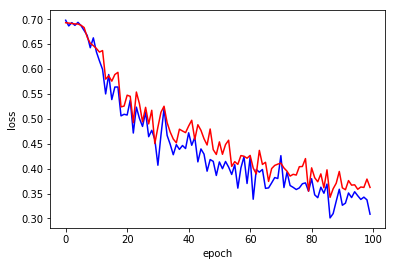

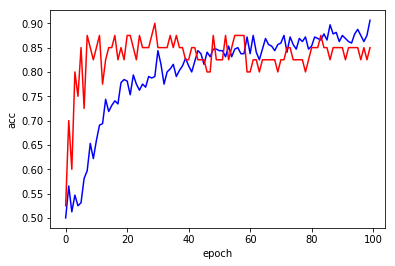

NameError: ignored

In [8]:
#Rede_TCC.load_weights('Melhor_modelo.hdf5')
checkpointer = ModelCheckpoint(filepath='Melhor_modelo.hdf5', monitor='val_loss',
                               verbose=1,save_best_only=True)

print('Treinando a Rede_TCC:')

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True)

Valida = (dataset_val, labels_val)

hist = Rede_TCC.fit_generator(datagen.flow(dataset_train, labels_train, batch_size = 20), 
                              steps_per_epoch=1*len(dataset_train)/20, epochs=100, 
                              validation_data=(dataset_val, labels_val), callbacks=[checkpointer])

# Por fim, será informado resultados de evolução da medida de erro (loss) ao longo das épocas
plt.plot(hist.history['loss'], 'b-', label='Perdas Treino')
plt.plot(hist.history['val_loss'], 'r-', label='Perdas Validacao')
plt.ylabel('Percas')
plt.xlabel('Epocas')
plt.show()


plt.plot(hist.history['acc'], 'b-', label='Acuracia Treino')
plt.plot(hist.history['val_acc'], 'r-', label='Acuracia Validacao')
plt.ylabel('Acuracia')
plt.xlabel('Epocas')
plt.show()

#Vamos calcular as predictions do dataset de teste
labels_pred = melhor_modelo.predict(dataset_test)> 0.49  
#predictions abaixo de 0.5 são consideradas como 0 (normal); e acima de 0.5 são consideradas como label 1 (hematoma)

In [13]:
#Agora abrimos o melhor modelo que geramos anteriormente
melhor_modelo = load_model('Melhor_modelo.hdf5')
#Usamos a função evaluate para avaliar a acurácia do nosso modelo no grupo de teste
print('Acurácia no dataset de teste: ', melhor_modelo.evaluate(dataset_test, labels_test, verbose=0)[1])
print('Acurácia no dataset de validação: ', melhor_modelo.evaluate(dataset_val, labels_val, verbose=0)[1])
print('Acurácia no dataset de Treino: ', melhor_modelo.evaluate(dataset_train, labels_train, verbose=0)[1])


Acurácia no dataset de teste:  0.825
Acurácia no dataset de validação:  0.825
Acurácia no dataset de Treino:  0.90625


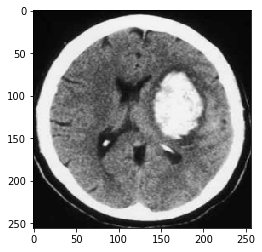

Pertence Qual Pasta: hematoma
Avaliação da Rede Neural: hematoma
Tempo médio de predição:
1000 loops, best of 3: 1.56 ms per loop


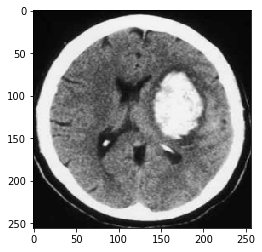

Pertence Qual Pasta: hematoma
Avaliação da Rede Neural: hematoma
Tempo médio de predição:
1000 loops, best of 3: 1.54 ms per loop


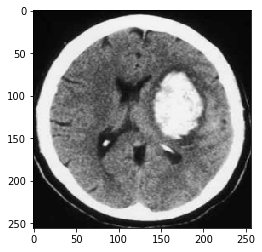

Pertence Qual Pasta: hematoma
Avaliação da Rede Neural: hematoma
Tempo médio de predição:


KeyboardInterrupt: ignored

In [32]:
for ID_arquivo  in range(0,19):
   #Agora vamos criar uma figura com a imagem escolhemos
  plt.imshow(np.squeeze(dataset_test[ID_imagem]), cmap='gray')
  plt.show()

  #Vamos mostrar a qual classe ela pertence
  print('Pertence Qual Pasta:', 'normal' if labels_test[ID_imagem]==0 else 'hematoma')
  predicao = np.round(melhor_modelo.predict(dataset_test[ID_imagem][np.newaxis,:,...], verbose=0))==0
  print('Avaliação da Rede Neural:', 'normal' if predicao else 'hematoma')

  #Calcula o tempo médio da analise da predição
  print('Tempo médio de predição:')
  %timeit melhor_modelo.predict(dataset_test[ID_imagem][np.newaxis,:,...], verbose=0)

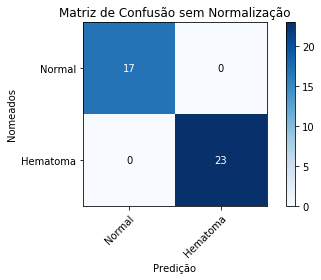

In [29]:
#Função para desenhar matriz de confusão
#Retirada de https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Matriz de Confusão Normalizada'
        else:
            title = 'Matriz de Confusão sem Normalizaçã'
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Nomeados',
           xlabel='Predição')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
  
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_test.astype('int'), classes=['Normal','Hematoma'],
                      title='Matriz de Confusão sem Normalização')


In [19]:
!pip3 install keras-vis

#@title Default title text
from vis.visualization import saliency
from vis.visualization import activation_maximization
from vis.visualization.__init__ import get_num_filters

ID_imagem = 3

Layer = 17

#mapa = saliency.visualize_saliency(teste, Layer, filter_indices=range(get_num_filters(teste.layers[Layer])), seed_input=ds_test[ID_imagem], backprop_modifier=None, \
#    grad_modifier="absolute")

#mapa = activation_maximization.visualize_activation(teste, Layer, filter_indices=range(get_num_filters(teste.layers[Layer])), seed_input=ds_test[ID_imagem], \
#    backprop_modifier=None, grad_modifier=None, act_max_weight=1, lp_norm_weight=10, \
#    tv_weight=10)

mapa = saliency.visualize_cam(melhor_modelo, Layer, filter_indices=range(get_num_filters(melhor_modelo.layers[Layer])), seed_input=dataset_test[ID_imagem], penultimate_layer_idx=Layer-1, \
    backprop_modifier=None, grad_modifier=None)

plt.imshow(np.squeeze(dataset_test[ID_imagem]), cmap='gray')
plt.show()
plt.imshow(np.squeeze(mapa), cmap='jet')
plt.show()

# Altere o ID da Imagem para analisar as imagen
ID_imagem = 2

Layer = -17

#mapa = saliency.visualize_saliency(teste, Layer, filter_indices=range(get_num_filters(teste.layers[Layer])), seed_input=ds_test[ID_imagem], backprop_modifier=None, \
#    grad_modifier="absolute")

#mapa = activation_maximization.visualize_activation(teste, Layer, filter_indices=range(get_num_filters(teste.layers[Layer])), seed_input=ds_test[ID_imagem], \
#    backprop_modifier=None, grad_modifier=None, act_max_weight=1, lp_norm_weight=10, \
#    tv_weight=10)

mapa = saliency.visualize_cam(melhor_modelo, Layer, filter_indices=range(get_num_filters(melhor_modelo.layers[Layer])), seed_input=dataset_test[ID_imagem], penultimate_layer_idx=Layer-1, \
    backprop_modifier=None, grad_modifier=None)

plt.imshow(np.squeeze(dataset_test[ID_imagem]), cmap='gray')
plt.show()
plt.imshow(np.squeeze(mapa), cmap='jet')
plt.show()

print ('\n' + '\033[1m' + 'Etapa Concluída. Parabéns, você finalizou o Workshop!')

from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/cub3pntkz8muQ/giphy.gif">')

ImportError: ignored